In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/7-7-faces'

Mounted at /content/drive


In [4]:
train_datagenerator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=.05,
    horizontal_flip=True,
    validation_split=0.1)

train_generator = train_datagenerator.flow_from_directory(
    data_dir,
    class_mode = 'categorical',
    target_size=(256, 256),
    batch_size=32,
    subset = 'training')

validation_generator = train_datagenerator.flow_from_directory(
    data_dir,
    class_mode='categorical',
    target_size=(256, 256),
    batch_size=32,
    subset='validation')


Found 1227 images belonging to 14 classes.
Found 131 images belonging to 14 classes.


In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=3, factor=0.5)]

In [7]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=35, callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
39/39 ━━━━━━━━━━━━━━━━━━━━ 1183s 30s/step - accuracy: 0.0949 - loss: 2.7335 - val_accuracy: 0.2748 - val_loss: 2.4732 - learning_rate: 0.0010
Epoch 2/35
39/39 ━━━━━━━━━━━━━━━━━━━━ 30s 768ms/step - accuracy: 0.2454 - loss: 2.4285 - val_accuracy: 0.4733 - val_loss: 2.2892 - learning_rate: 0.0010
Epoch 3/35
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 771ms/step - accuracy: 0.3334 - loss: 2.2508 - val_accuracy: 0.5038 - val_loss: 2.1096 - learning_rate: 0.0010
Epoch 4/35
39/39 ━━━━━━━━━━━━━━━━━━━━ 30s 757ms/step - accuracy: 0.3463 - loss: 2.0916 - val_accuracy: 0.5649 - val_loss: 1.9583 - learning_rate: 0.0010
Epoch 5/35
39/39 ━━━━━━━━━━━━━━━━━━━━ 30s 765ms/step - accuracy: 0.4248 - loss: 1.9500 - val_accuracy: 0.5496 - val_loss: 1.8102 - learning_rate: 0.0010
Epoch 6/35
39/39 ━━━━━━━━━━━━━━━━━━━━ 33s 847ms/step - accuracy: 0.4715 - loss: 1.8202 - val_accuracy: 0.6107 - val_loss: 1.6875 - learning_rate: 0.0010
Epoch 7/35
39/39 ━━━━━━━━━━━━━━━━━━━━ 30s 758ms/step - accuracy: 0.4998 - loss: 1.

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 479ms/step


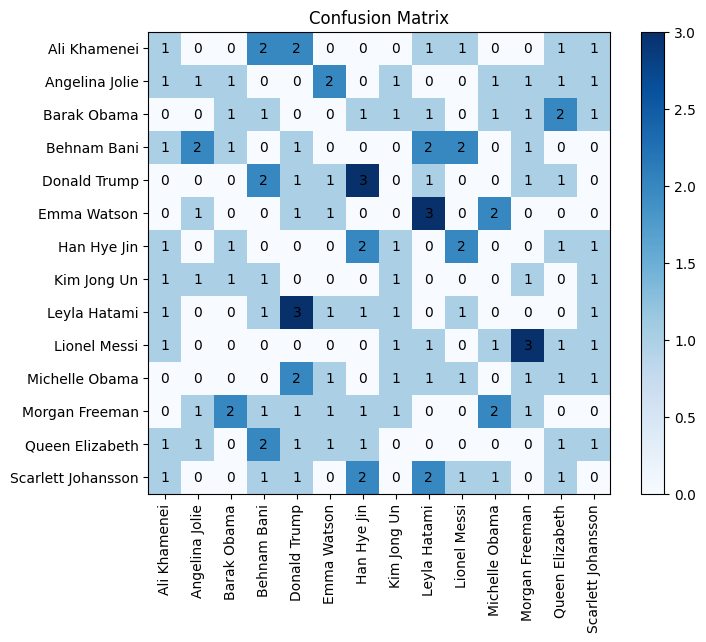

In [33]:
labels = ['Ali Khamenei', 'Angelina Jolie', 'Barak Obama', 'Behnam Bani', 'Donald Trump',
          'Emma Watson', 'Han Hye Jin', 'Kim Jong Un', 'Leyla Hatami', 'Lionel Messi',
          'Michelle Obama', 'Morgan Freeman', 'Queen Elizabeth', 'Scarlett Johansson']

y_pred = np.argmax(model.predict(validation_generator), axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap="Blues")
plt.xticks(range(len(labels)), labels, rotation=90)
plt.yticks(range(len(labels)), labels)
plt.title("Confusion Matrix")
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], ha="center", va="center", color="black")
plt.colorbar()
plt.show()

In [23]:
def inference(image_path):
    img = cv.imread(image_path)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_resized = cv.resize(img_rgb, (256, 256)) / 255.
    pred = np.argmax(model.predict(np.expand_dims(img_resized, axis=0)))
    plt.imshow(img_rgb)
    plt.title(f"Predicted: {labels[pred]}")
    plt.axis('off')
    plt.show()
    return labels[pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 51s 51s/step


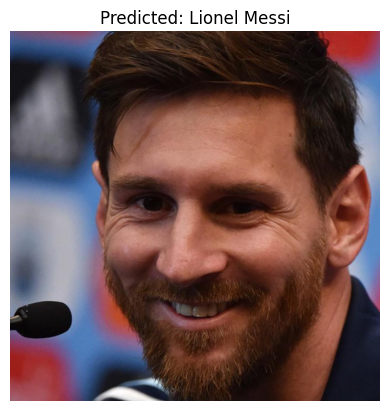

'Lionel Messi'

In [24]:
inference("/content/drive/MyDrive/7-7-faces/Lionel_Messi/Lionel-Messi-77_01.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


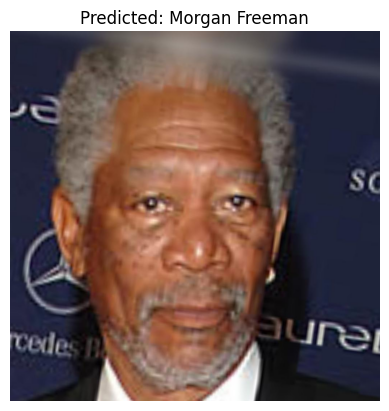

'Morgan Freeman'

In [25]:
inference("/content/drive/MyDrive/7-7-faces/Morgan_Freeman/Morgan-Freeman-102_02.jpg")